## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [22]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [23]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [24]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [25]:
X = df.drop(columns=['math_score'],axis=1)

In [26]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [27]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [28]:
y = df['math_score']

In [29]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [30]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [31]:
X = preprocessor.fit_transform(X)

In [32]:
X.shape

(1000, 19)

In [33]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split,cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [34]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [66]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]
mae_list = []
rmse_list = []
r2_train_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    r2_train_list.append(model_train_r2)
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    mae_list.append(model_test_mae)
    rmse_list.append(model_test_rmse)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3243
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
-----------------------

In [67]:
pd.DataFrame(list(zip(model_list, rmse_list)), columns=['Model Name', 'rmse_list']).sort_values(by=["rmse_list"],ascending=True)

,Model Name,rmse_list
2,Ridge,5.390387
0,Linear Regression,5.395987
5,Random Forest Regressor,5.922388
7,CatBoosting Regressor,6.008632
8,AdaBoost Regressor,6.055909
6,XGBRegressor,6.473307
1,Lasso,6.519695
3,K-Neighbors Regressor,7.253041
4,Decision Tree,8.122500


In [68]:
pd.DataFrame(list(zip(model_list, mae_list)), columns=['Model Name', 'mae_list']).sort_values(by=["mae_list"],ascending=True)

,Model Name,mae_list
2,Ridge,4.211101
0,Linear Regression,4.215820
7,CatBoosting Regressor,4.612532
5,Random Forest Regressor,4.629187
8,AdaBoost Regressor,4.722553
6,XGBRegressor,5.057731
1,Lasso,5.157882
3,K-Neighbors Regressor,5.621000
4,Decision Tree,6.405000


In [70]:
# Ensure r2_train_list is defined and contains training R² scores
eval_df = pd.DataFrame(
    list(zip(model_list, r2_list, r2_train_list)),  # Corrected zip usage
    columns=['Model Name', 'R2_Score', 'R2_training_score']  # Corrected column name
).sort_values(by=["R2_Score"], ascending=False)


In [71]:
eval_df['variance'] = eval_df['R2_Score'] - eval_df['R2_training_score']

In [74]:
eval_df.sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score,R2_training_score,variance
2,Ridge,0.880593,0.874304,0.006289
0,Linear Regression,0.880345,0.874257,0.006088
5,Random Forest Regressor,0.855860,0.976999,-0.121138
7,CatBoosting Regressor,0.851632,0.958936,-0.107304
8,AdaBoost Regressor,0.849288,0.849440,-0.000152
6,XGBRegressor,0.827797,0.995500,-0.167703
1,Lasso,0.825320,0.807146,0.018174
3,K-Neighbors Regressor,0.783813,0.855498,-0.071685
4,Decision Tree,0.728876,0.999653,-0.270778


In [75]:
models = {
    "Linear Regression": LinearRegression(),  # No hyperparameters for LinearRegression as it has no regularization
    "Lasso": Lasso(alpha=0.8, max_iter=1000),  # alpha is the regularization strength
    "Ridge": Ridge(alpha=5.0),  # alpha is the regularization strength
    "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=5, weights='uniform', metric='minkowski'),  # n_neighbors is the number of neighbors
    "Decision Tree": DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=5),  # Depth, split, and leaf control model complexity
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42),  # Number of trees and depth
    "XGBRegressor": XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=5, subsample=0.8, colsample_bytree=0.8),  # Learning rate and regularization parameters
    "CatBoosting Regressor": CatBoostRegressor(learning_rate=0.1, depth=6, l2_leaf_reg=3, iterations=100, verbose=False),  # Regularization and depth
    "AdaBoost Regressor": AdaBoostRegressor(n_estimators=50, learning_rate=0.1)  # Number of estimators and learning rate
}
model_list = []
r2_list =[]
mae_list = []
rmse_list = []
r2_train_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    r2_train_list.append(model_train_r2)
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    mae_list.append(model_test_mae)
    rmse_list.append(model_test_rmse)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3243
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.3218
- Mean Absolute Error: 4.9933
- R2 Score: 0.8227
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.2268
- Mean Absolute Error: 4.9258
- R2 Score: 0.8407


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3286
- Mean Absolute Error: 4.2640
- R2 Score: 0.8741
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3838
- Mean Absolute Error: 4.2022
- R2 Score: 0.8809


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
-----------------------

### Results

In [76]:
# Ensure r2_train_list is defined and contains training R² scores
eval_df_params = pd.DataFrame(
    list(zip(model_list, r2_list, r2_train_list)),  # Corrected zip usage
    columns=['Model Name', 'R2_Score', 'R2_training_score']  # Corrected column name
).sort_values(by=["R2_Score"], ascending=False)


In [78]:
eval_df_params

,Model Name,R2_Score,R2_training_score
2,Ridge,0.880887,0.874056
0,Linear Regression,0.880345,0.874257
6,XGBRegressor,0.872746,0.950035
7,CatBoosting Regressor,0.856525,0.905080
5,Random Forest Regressor,0.849670,0.903727
1,Lasso,0.840662,0.822728
4,Decision Tree,0.832512,0.904522
8,AdaBoost Regressor,0.812939,0.816172
3,K-Neighbors Regressor,0.783813,0.855498


In [79]:
eval_df_params['variance'] =eval_df_params['R2_Score'] - eval_df_params['R2_training_score']
eval_df_params

,Model Name,R2_Score,R2_training_score,variance
2,Ridge,0.880887,0.874056,0.006831
0,Linear Regression,0.880345,0.874257,0.006088
6,XGBRegressor,0.872746,0.950035,-0.077289
7,CatBoosting Regressor,0.856525,0.905080,-0.048555
5,Random Forest Regressor,0.849670,0.903727,-0.054057
1,Lasso,0.840662,0.822728,0.017934
4,Decision Tree,0.832512,0.904522,-0.072011
8,AdaBoost Regressor,0.812939,0.816172,-0.003232
3,K-Neighbors Regressor,0.783813,0.855498,-0.071685


## Linear Regression

In [80]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.03


## Plot y_pred and y_test

521    91
737    53
740    80
660    74
411    84
       ..
408    52
332    62
208    74
613    65
78     61
Name: math_score, Length: 200, dtype: int64

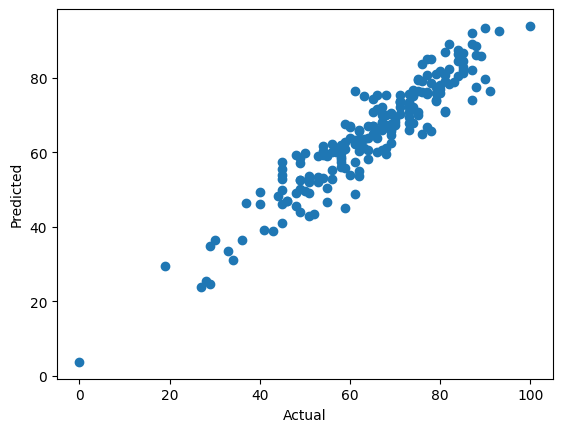

In [85]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

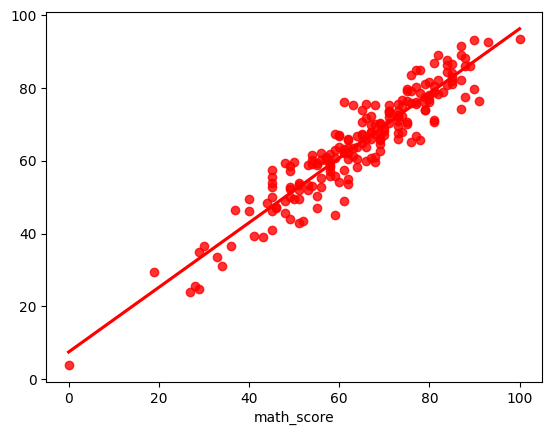

In [56]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [50]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
